<a href="https://colab.research.google.com/github/rmnvg/linear_regression_price/blob/main/Untitled18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf### models
import pandas as pd ### reading and processing data
import seaborn as sns ### visualization
import numpy as np### math computations
import matplotlib.pyplot as plt### plotting bar chart
from tensorflow.keras.layers import Normalization, Dense, InputLayer
from tensorflow.keras.losses import MeanSquaredError, Huber, MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [ ]:
data = pd.read_csv("/content/train.csv")
data.head()

v.id  on road old  on road now  years      km  rating  condition  economy  \
0     1       535651       798186      3   78945       1          2       14   
1     2       591911       861056      6  117220       5          9        9   
2     3       686990       770762      2  132538       2          8       15   
3     4       573999       722381      4  101065       4          3       11   
4     5       691388       811335      6   61559       3          9       12   

   top speed  hp  torque  current price  
0        177  73     123       351318.0  
1        148  74      95       285001.5  
2        181  53      97       215386.0  
3        197  54     116       244295.5  
4        160  53     105       531114.5

In [ ]:
data.shape

(1000, 12)

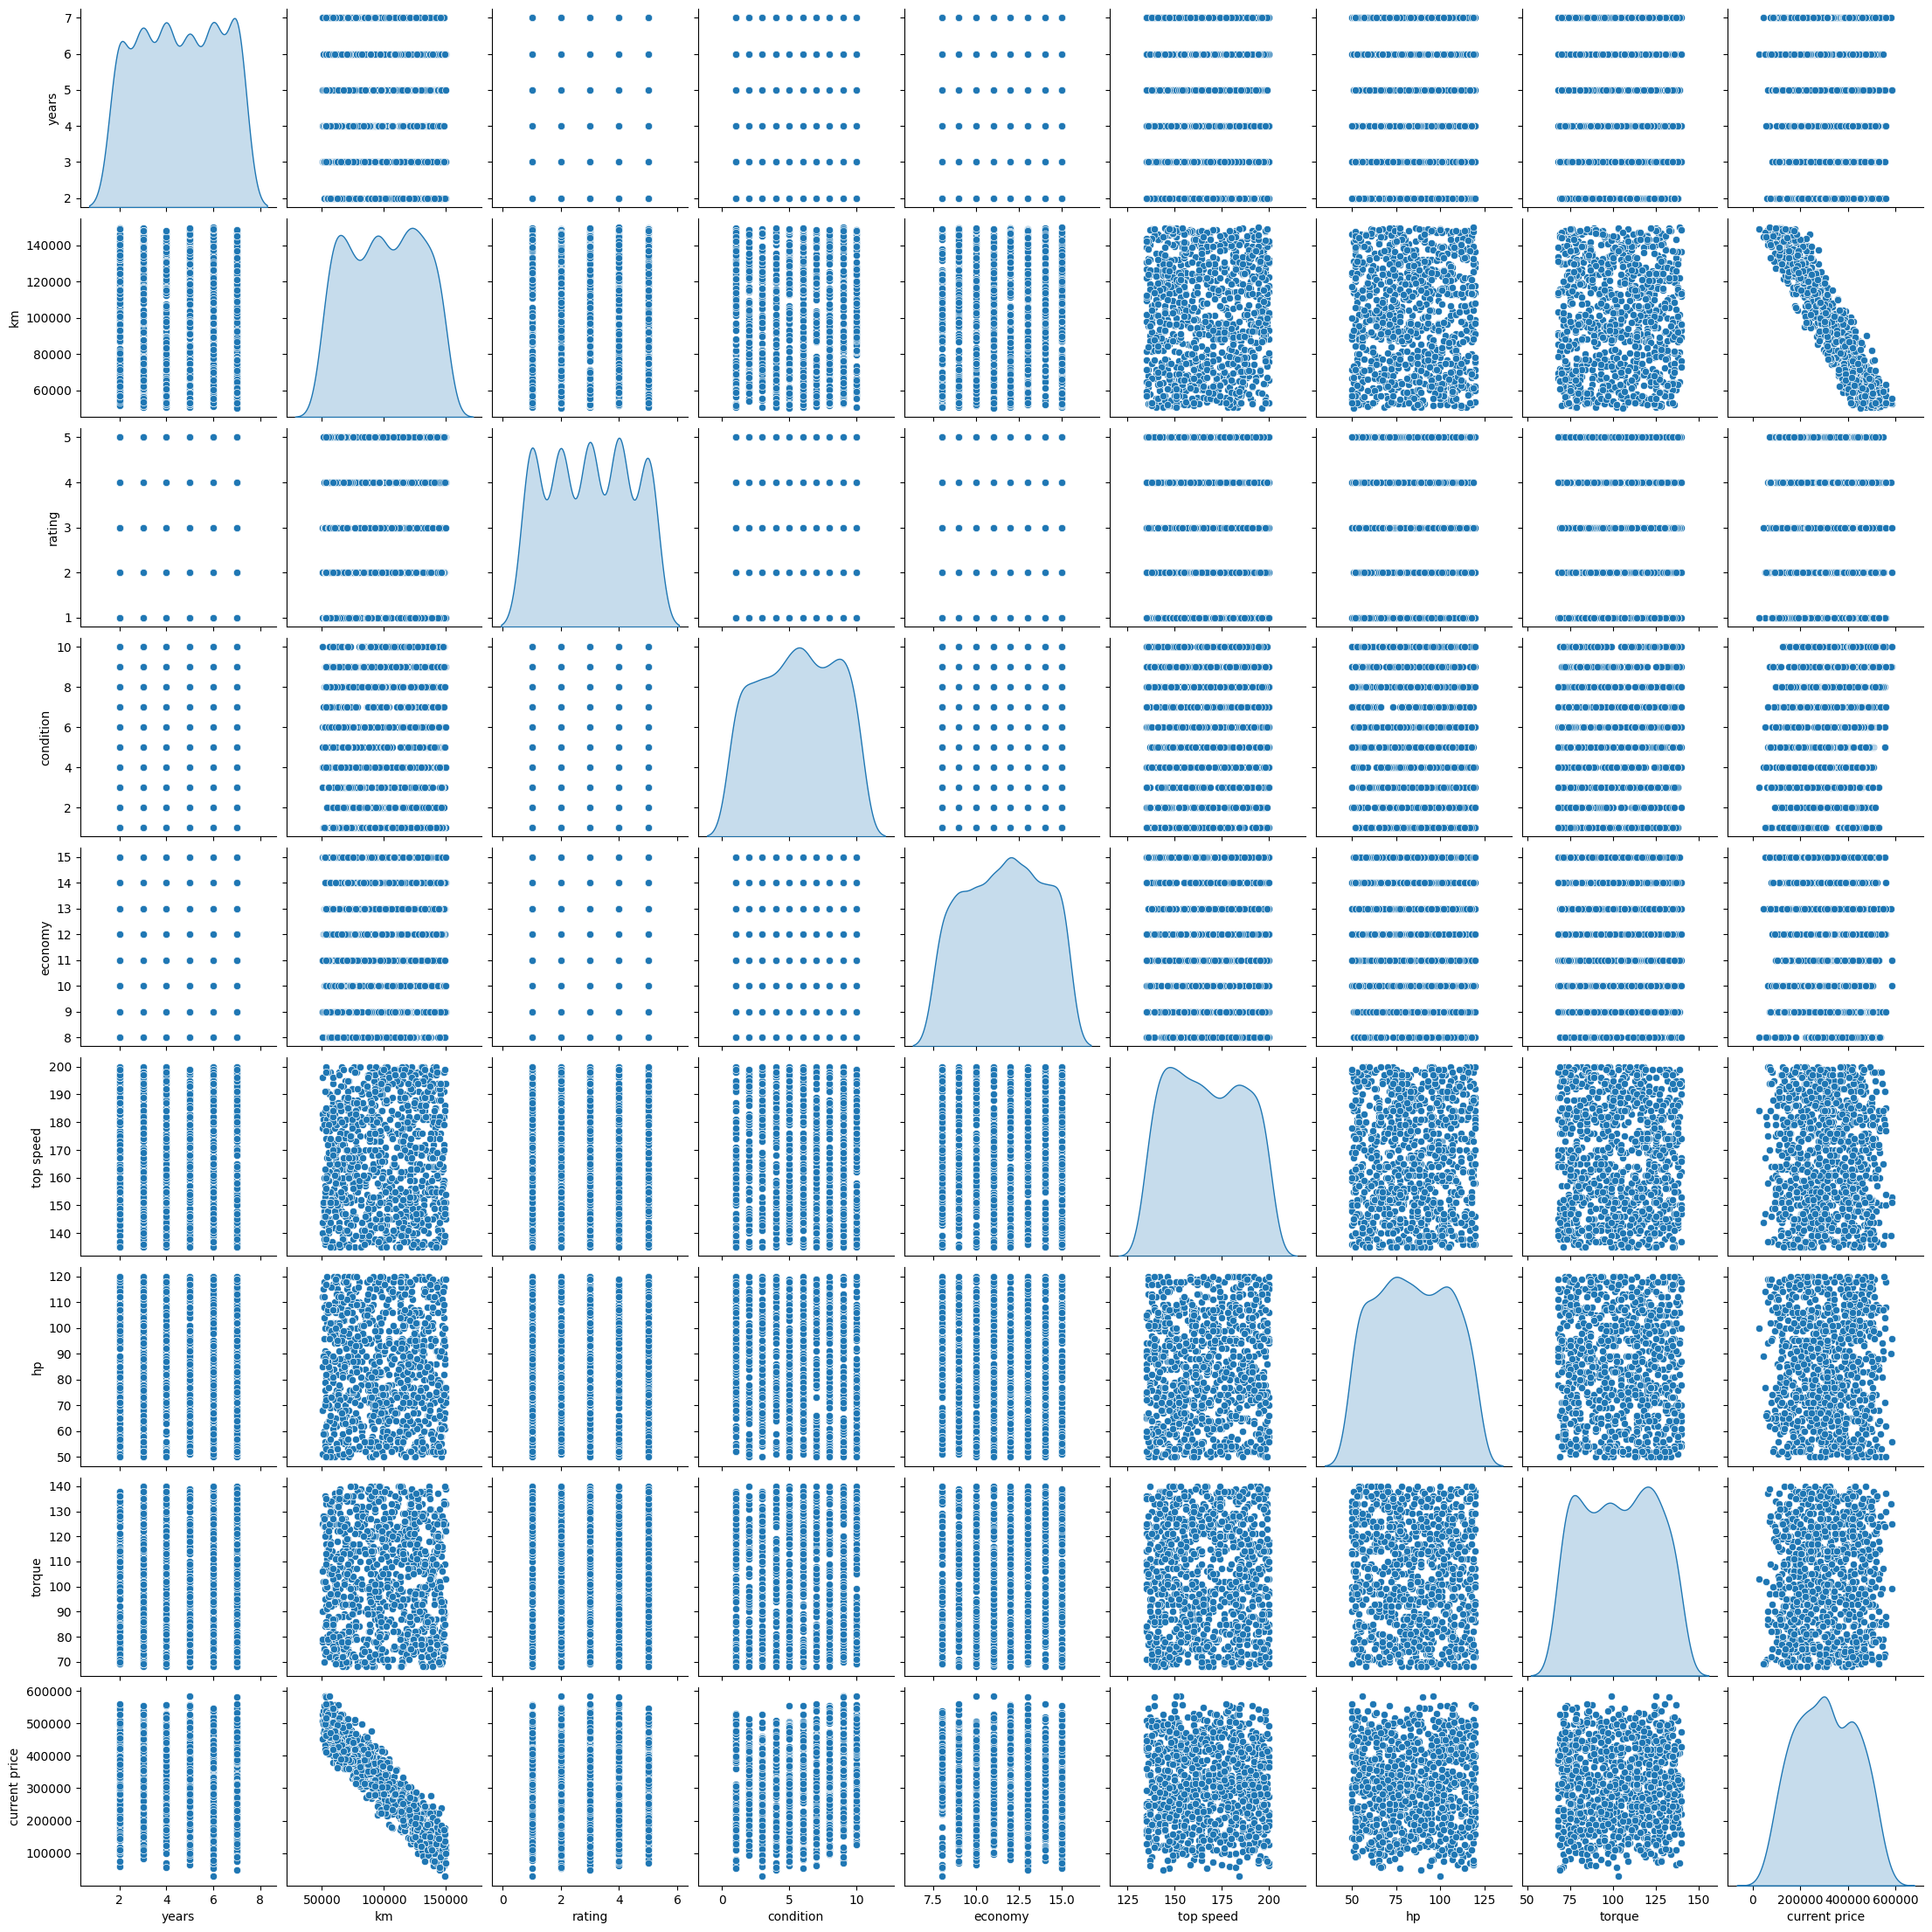

In [ ]:
sns.pairplot(data[['years', 'km', 'rating', 'condition', 'economy', 'top speed', 'hp', 'torque', 'current price']], diag_kind='kde')

In [ ]:
tensor_data = tf.constant(data)
tensor_data = tf.cast(tensor_data, tf.float32)
print(tensor_data)

tf.Tensor(
[[1.000000e+00 5.356510e+05 7.981860e+05 ... 7.300000e+01 1.230000e+02
  3.513180e+05]
 [2.000000e+00 5.919110e+05 8.610560e+05 ... 7.400000e+01 9.500000e+01
  2.850015e+05]
 [3.000000e+00 6.869900e+05 7.707620e+05 ... 5.300000e+01 9.700000e+01
  2.153860e+05]
 ...
 [9.980000e+02 6.463440e+05 8.427330e+05 ... 1.130000e+02 8.900000e+01
  4.058710e+05]
 [9.990000e+02 5.355590e+05 7.324390e+05 ... 1.120000e+02 1.280000e+02
  7.439800e+04]
 [1.000000e+03 5.901050e+05 7.797430e+05 ... 9.900000e+01 9.600000e+01
  4.149385e+05]], shape=(1000, 12), dtype=float32)


In [ ]:
tensor_data = tf.random.shuffle(tensor_data)
print(tensor_data[:5])

tf.Tensor(
[[3.240000e+02 5.361490e+05 8.224520e+05 7.000000e+00 9.852900e+04
  3.000000e+00 6.000000e+00 1.200000e+01 1.430000e+02 6.900000e+01
  1.380000e+02 2.810375e+05]
 [6.950000e+02 5.882510e+05 7.384190e+05 7.000000e+00 6.381500e+04
  4.000000e+00 1.000000e+00 1.200000e+01 1.420000e+02 1.020000e+02
  1.330000e+02 4.004445e+05]
 [5.860000e+02 5.891650e+05 8.071500e+05 6.000000e+00 5.307500e+04
  5.000000e+00 7.000000e+00 9.000000e+00 2.000000e+02 7.300000e+01
  1.170000e+02 4.921710e+05]
 [6.100000e+01 5.951840e+05 8.609070e+05 7.000000e+00 1.227780e+05
  2.000000e+00 9.000000e+00 9.000000e+00 1.360000e+02 1.060000e+02
  1.360000e+02 2.583000e+05]
 [2.780000e+02 6.998590e+05 8.792100e+05 5.000000e+00 1.364970e+05
  1.000000e+00 1.000000e+00 1.400000e+01 1.910000e+02 8.000000e+01
  1.100000e+02 2.422735e+05]], shape=(5, 12), dtype=float32)


In [ ]:
X = tensor_data[:,3:-1]
print(X[:5])

tf.Tensor(
[[7.00000e+00 9.85290e+04 3.00000e+00 6.00000e+00 1.20000e+01 1.43000e+02
  6.90000e+01 1.38000e+02]
 [7.00000e+00 6.38150e+04 4.00000e+00 1.00000e+00 1.20000e+01 1.42000e+02
  1.02000e+02 1.33000e+02]
 [6.00000e+00 5.30750e+04 5.00000e+00 7.00000e+00 9.00000e+00 2.00000e+02
  7.30000e+01 1.17000e+02]
 [7.00000e+00 1.22778e+05 2.00000e+00 9.00000e+00 9.00000e+00 1.36000e+02
  1.06000e+02 1.36000e+02]
 [5.00000e+00 1.36497e+05 1.00000e+00 1.00000e+00 1.40000e+01 1.91000e+02
  8.00000e+01 1.10000e+02]], shape=(5, 8), dtype=float32)


In [ ]:
y = tensor_data[:,-1]
print(y[:5].shape)
y = tf.expand_dims(y, axis = -1)
print(y[:5])

(5,)
tf.Tensor(
[[281037.5]
 [400444.5]
 [492171. ]
 [258300. ]
 [242273.5]], shape=(5, 1), dtype=float32)


In [ ]:
print(X.shape)  # Should be (num_samples, num_features)
print(y.shape)  # Should be (num_samples,)


(1000, 8)


AttributeError: 'list' object has no attribute 'shape'

In [ ]:
nor = Normalization()
x_nor = tf.constant([[1,2,3],
                     [3,4,5]])
nor.adapt(x_nor)
nor(x_nor)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[-1., -1., -1.],
       [ 1.,  1.,  1.]], dtype=float32)>

ye by default -1 hita hai axis matlab columnn wise 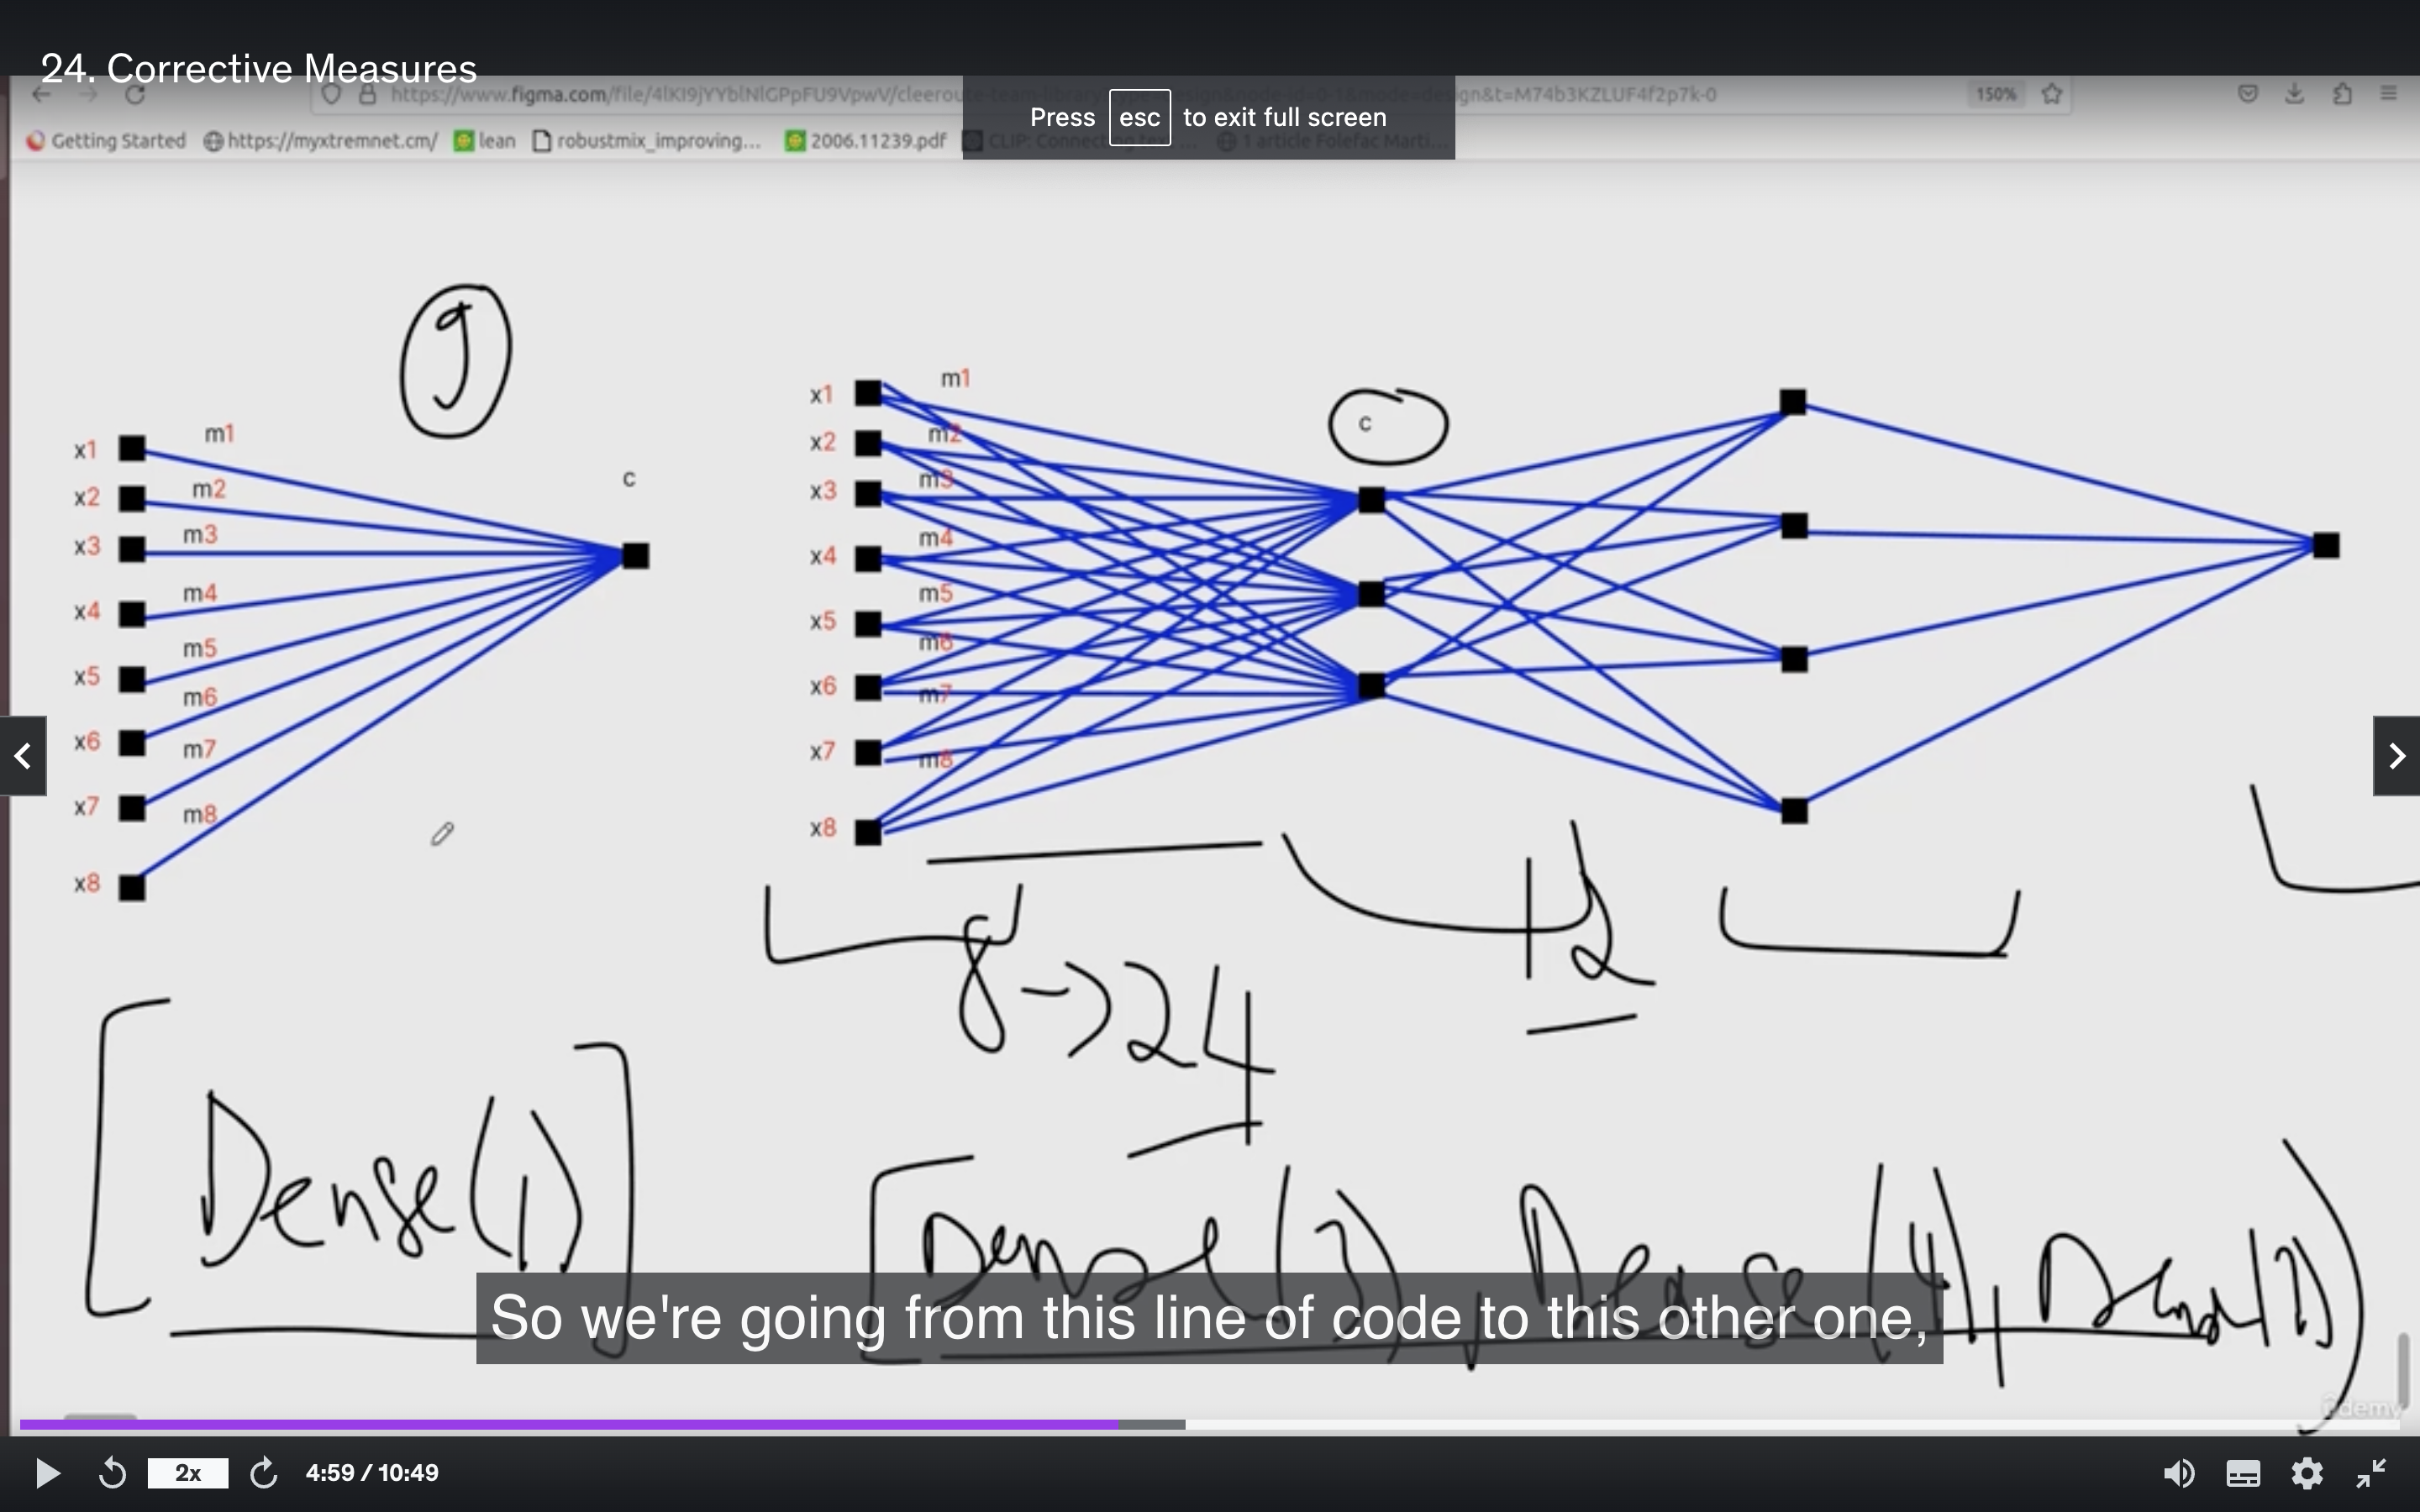

In [ ]:
nor = Normalization()
nor.adapt(X)
nor(X)

<tf.Tensor: shape=(1000, 8), dtype=float32, numpy=
array([[ 1.4194928 , -0.059906  ,  0.00855871, ..., -1.2393434 ,
        -0.7580939 ,  1.6427546 ],
       [ 1.4194928 , -1.2513579 ,  0.7217797 , ..., -1.291214  ,
         0.8511377 ,  1.4052043 ],
       [ 0.8374951 , -1.6199756 ,  1.4350007 , ...,  1.7172819 ,
        -0.5630355 ,  0.6450437 ],
       ...,
       [ 0.25549737,  0.44929433,  0.7217797 , ..., -0.5650254 ,
         0.50978553,  0.5975336 ],
       [-0.3265004 , -0.702756  ,  0.7217797 , ..., -0.04631916,
        -0.02662498,  0.83508384],
       [-0.3265004 , -1.3507543 ,  0.7217797 , ..., -0.35754287,
         1.6313713 , -0.21013711]], dtype=float32)>

In [ ]:
model = tf.keras.Sequential([

  nor,
  Dense(1)
],name="firstapi")

ye ek simple layer add kari hai isme output varibale 1 he hai and nor ka matlab hai normalizer
ab iusme input isliyeb mention nahi kara bcoz point is that nor layer uska apne aap dhayan rakh lega

In [ ]:
model = tf.keras.Sequential()

In [ ]:
model.add(nor)

In [ ]:
model.add(Dense(1))

ye bhi tarik hai add karne ka

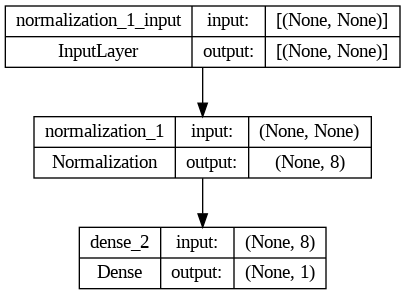

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file="my_first_ji.png",
    show_shapes = True,
)

In [ ]:
modell = tf.keras.Sequential()

In [ ]:
modell.add( InputLayer(input_shape=(8,)))

In [ ]:
modell.add(nor)

In [ ]:
modell.add(Dense(1))

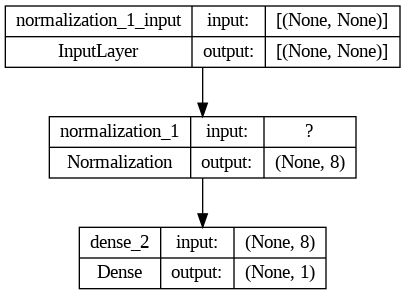

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file="myfirst_ji.png",
    show_shapes = True,
)

In [ ]:
model = tf.keras.Sequential([
  InputLayer(input_shape=(8,)),
  nor,
  Dense(1)
],name="firstapii")

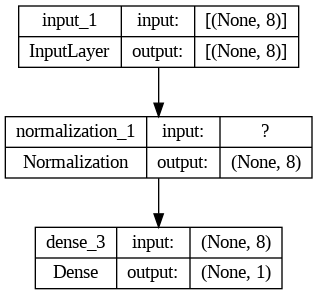

In [ ]:
tf.keras.utils.plot_model(
    modell,
    to_file="myfirnst_ji.png",
    show_shapes = True,
)

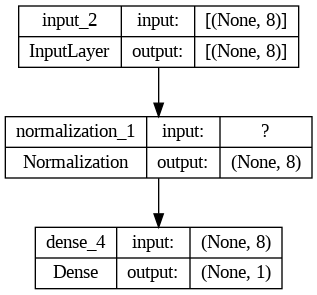

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file="myfirst_ji.png",
    show_shapes = True,
)

In [ ]:
y = [1,2,4]
x = [3,1,4]
mse = tf.keras.losses.MeanSquaredError()
print(mse(x,y).numpy())

1


In [ ]:
model.compile(optimizer='sgd',loss=tf.keras.losses.Huber())

n Keras, the verbose parameter is used to control the amount of information displayed during training of a model. It is commonly used in methods like fit(), evaluate(), and predict(). The verbose parameter can take the following values:

0: Silent mode. No output will be displayed during training.
1: Progress bar. A progress bar will be shown during training, which displays the epoch number, the percentage of completion, and other metrics like loss and accuracy.
2: One line per epoch. Instead of a progress bar, detailed information about the training progress will be shown on a per-epoch basis, including loss and accuracy metrics.


In [ ]:
X = tensor_data[:,3:-1]
print(X[:5])

tf.Tensor(
[[7.00000e+00 9.85290e+04 3.00000e+00 6.00000e+00 1.20000e+01 1.43000e+02
  6.90000e+01 1.38000e+02]
 [7.00000e+00 6.38150e+04 4.00000e+00 1.00000e+00 1.20000e+01 1.42000e+02
  1.02000e+02 1.33000e+02]
 [6.00000e+00 5.30750e+04 5.00000e+00 7.00000e+00 9.00000e+00 2.00000e+02
  7.30000e+01 1.17000e+02]
 [7.00000e+00 1.22778e+05 2.00000e+00 9.00000e+00 9.00000e+00 1.36000e+02
  1.06000e+02 1.36000e+02]
 [5.00000e+00 1.36497e+05 1.00000e+00 1.00000e+00 1.40000e+01 1.91000e+02
  8.00000e+01 1.10000e+02]], shape=(5, 8), dtype=float32)


In [ ]:
y = tensor_data[:,-1]
print(y[:5].shape)
y = tf.expand_dims(y, axis = -1)
print(y[:5])

(5,)
tf.Tensor(
[[281037.5]
 [400444.5]
 [492171. ]
 [258300. ]
 [242273.5]], shape=(5, 1), dtype=float32)


In [ ]:
print(X.shape)  # Should be (num_samples, num_features)
print(y.shape)  # Should be (num_samples,)


(1000, 8)
(1000, 1)


In [ ]:
nor = Normalization()
nor.adapt(X)
nor(X)

<tf.Tensor: shape=(1000, 8), dtype=float32, numpy=
array([[ 1.4194928 , -0.059906  ,  0.00855871, ..., -1.2393434 ,
        -0.7580939 ,  1.6427546 ],
       [ 1.4194928 , -1.2513579 ,  0.7217797 , ..., -1.291214  ,
         0.8511377 ,  1.4052043 ],
       [ 0.8374951 , -1.6199756 ,  1.4350007 , ...,  1.7172819 ,
        -0.5630355 ,  0.6450437 ],
       ...,
       [ 0.25549737,  0.44929433,  0.7217797 , ..., -0.5650254 ,
         0.50978553,  0.5975336 ],
       [-0.3265004 , -0.702756  ,  0.7217797 , ..., -0.04631916,
        -0.02662498,  0.83508384],
       [-0.3265004 , -1.3507543 ,  0.7217797 , ..., -0.35754287,
         1.6313713 , -0.21013711]], dtype=float32)>

In [ ]:
model.fit(X,y,epochs=10,verbose=1)

Epoch 1/10
32/32 [==============================] - 1s 4ms/step - loss: 308519.6250
Epoch 2/10
32/32 [==============================] - 0s 3ms/step - loss: 308519.2812
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 308518.9375
Epoch 4/10
32/32 [==============================] - 0s 3ms/step - loss: 308518.6562
Epoch 5/10
32/32 [==============================] - 0s 4ms/step - loss: 308518.3438
Epoch 6/10
32/32 [==============================] - 0s 4ms/step - loss: 308517.9688
Epoch 7/10
32/32 [==============================] - 0s 4ms/step - loss: 308517.6562
Epoch 8/10
32/32 [==============================] - 0s 3ms/step - loss: 308517.3438
Epoch 9/10
32/32 [==============================] - 0s 3ms/step - loss: 308517.0312
Epoch 10/10
32/32 [==============================] - 0s 4ms/step - loss: 308516.7188


In [ ]:
model.compile(optimizer=Adam(learning_rate=1e-3),loss=tf.keras.losses.Huber())

In [ ]:
histoy = model.fit(X,y,epochs=100,verbose=1)

Epoch 1/100
32/32 [==============================] - 0s 4ms/step - loss: 308513.3125
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 308513.2812
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 308513.2500
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 308513.2188
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 308513.2188
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 308513.1875
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 308513.1250
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 308513.0938
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 308513.0938
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 308513.0312
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 308512.9375
Epoch 12/100
32/32 [==============================] - 0s 2ms/st

In [ ]:
histoy.history

{'loss': [308513.3125,
  308513.28125,
  308513.25,
  308513.21875,
  308513.21875,
  308513.1875,
  308513.125,
  308513.09375,
  308513.09375,
  308513.03125,
  308512.9375,
  308513.0,
  308512.90625,
  308512.9375,
  308512.90625,
  308512.84375,
  308512.84375,
  308512.78125,
  308512.75,
  308512.6875,
  308512.71875,
  308512.6875,
  308512.625,
  308512.53125,
  308512.5625,
  308512.53125,
  308512.46875,
  308512.5,
  308512.375,
  308512.40625,
  308512.375,
  308512.34375,
  308512.28125,
  308512.28125,
  308512.28125,
  308512.1875,
  308512.1875,
  308512.15625,
  308512.09375,
  308512.0625,
  308512.03125,
  308512.0,
  308512.0,
  308511.96875,
  308511.90625,
  308511.90625,
  308511.84375,
  308511.84375,
  308511.8125,
  308511.75,
  308511.71875,
  308511.6875,
  308511.6875,
  308511.625,
  308511.59375,
  308511.59375,
  308511.5625,
  308511.5,
  308511.5,
  308511.4375,
  308511.4375,
  308511.40625,
  308511.3125,
  308511.3125,
  308511.21875,
  308511.25,


In [ ]:
histoy.history["loss"]

[308513.3125,
 308513.28125,
 308513.25,
 308513.21875,
 308513.21875,
 308513.1875,
 308513.125,
 308513.09375,
 308513.09375,
 308513.03125,
 308512.9375,
 308513.0,
 308512.90625,
 308512.9375,
 308512.90625,
 308512.84375,
 308512.84375,
 308512.78125,
 308512.75,
 308512.6875,
 308512.71875,
 308512.6875,
 308512.625,
 308512.53125,
 308512.5625,
 308512.53125,
 308512.46875,
 308512.5,
 308512.375,
 308512.40625,
 308512.375,
 308512.34375,
 308512.28125,
 308512.28125,
 308512.28125,
 308512.1875,
 308512.1875,
 308512.15625,
 308512.09375,
 308512.0625,
 308512.03125,
 308512.0,
 308512.0,
 308511.96875,
 308511.90625,
 308511.90625,
 308511.84375,
 308511.84375,
 308511.8125,
 308511.75,
 308511.71875,
 308511.6875,
 308511.6875,
 308511.625,
 308511.59375,
 308511.59375,
 308511.5625,
 308511.5,
 308511.5,
 308511.4375,
 308511.4375,
 308511.40625,
 308511.3125,
 308511.3125,
 308511.21875,
 308511.25,
 308511.1875,
 308511.1875,
 308511.125,
 308511.125,
 308511.0625,
 30851

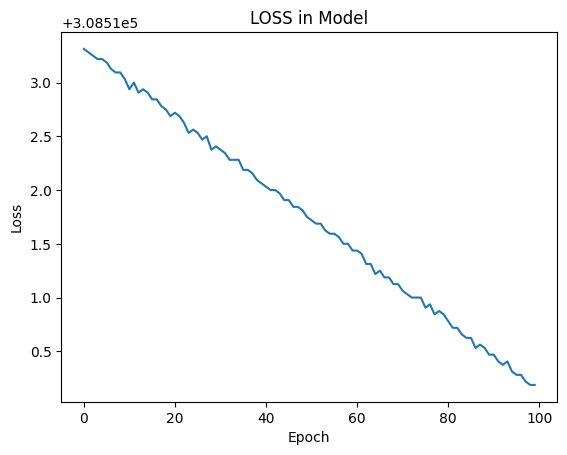

In [ ]:
plt.plot(histoy.history["loss"])
plt.title("LOSS in Model")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [ ]:
model.compile(optimizer=Adam(learning_rate=1e-3),loss=tf.keras.losses.Huber(),metrics=RootMeanSquaredError())

In [ ]:
model.fit(X,y,epochs=10,verbose=1)

Epoch 1/10
32/32 [==============================] - 0s 2ms/step - loss: 308510.1562 - root_mean_squared_error: 333252.6250
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 308510.0938 - root_mean_squared_error: 333252.6250
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 308510.0938 - root_mean_squared_error: 333252.5938
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 308510.0312 - root_mean_squared_error: 333252.5625
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 308509.9688 - root_mean_squared_error: 333252.5312
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 308509.9062 - root_mean_squared_error: 333252.5000
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: 308509.8750 - root_mean_squared_error: 333252.4688
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 308509.9062 - root_mean_squared_error: 333252.4062
Epoch 9/10
32/32

In [ ]:
model.evaluate(X,y)

32/32 [==============================] - 1s 3ms/step - loss: 308509.8125 - root_mean_squared_error: 333252.3750


[308509.8125, 333252.375]

In [ ]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
DATA_SIZE = len(X)

In [ ]:
X_train = X[:int(TRAIN_RATIO*DATA_SIZE )]

In [ ]:
y_train = y[:int(TRAIN_RATIO*DATA_SIZE)]

In [ ]:
print(X_train.shape)

(800, 8)


In [ ]:
print(y_train.shape)

(800, 1)


In [ ]:
X_val = X[int(TRAIN_RATIO*DATA_SIZE ):int((TRAIN_RATIO+VAL_RATIO)*DATA_SIZE )]

In [ ]:
y_val = y[int(TRAIN_RATIO*DATA_SIZE ):int((TRAIN_RATIO+VAL_RATIO)*DATA_SIZE )]

In [ ]:
print(X_val.shape)

(100, 8)


In [ ]:
print(y_val.shape)

(100, 1)


In [ ]:
X_test = X[int((TRAIN_RATIO+VAL_RATIO)*DATA_SIZE ):]
y_test = y[int((TRAIN_RATIO+VAL_RATIO)*DATA_SIZE ):]
print(X_test.shape,y_test.shape)

(100, 8) (100, 1)


In [ ]:
normalizer = Normalization()
normalizer.adapt(X_test)

In [ ]:
histo = model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=100,verbose=1)

Epoch 1/100
25/25 [==============================] - 0s 11ms/step - loss: 307294.0625 - root_mean_squared_error: 331684.9062 - val_loss: 309237.7500 - val_root_mean_squared_error: 335326.8438
Epoch 2/100
25/25 [==============================] - 0s 6ms/step - loss: 307294.0625 - root_mean_squared_error: 331684.8750 - val_loss: 309237.7500 - val_root_mean_squared_error: 335326.8125
Epoch 3/100
25/25 [==============================] - 0s 6ms/step - loss: 307294.0312 - root_mean_squared_error: 331684.8750 - val_loss: 309237.6875 - val_root_mean_squared_error: 335326.8125
Epoch 4/100
25/25 [==============================] - 0s 5ms/step - loss: 307293.9688 - root_mean_squared_error: 331684.8125 - val_loss: 309237.6875 - val_root_mean_squared_error: 335326.7812
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 307294.0000 - root_mean_squared_error: 331684.8125 - val_loss: 309237.6250 - val_root_mean_squared_error: 335326.7812
Epoch 6/100
25/25 [=========================

In [ ]:
histo = model.fit(X,y,validation_split=0.2,epochs=100,verbose=1)

Epoch 1/100
25/25 [==============================] - 0s 6ms/step - loss: 307291.5625 - root_mean_squared_error: 331682.5938 - val_loss: 313370.2812 - val_root_mean_squared_error: 339447.5625
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 307291.5312 - root_mean_squared_error: 331682.5625 - val_loss: 313370.2500 - val_root_mean_squared_error: 339447.5312
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 307291.5312 - root_mean_squared_error: 331682.5625 - val_loss: 313370.2188 - val_root_mean_squared_error: 339447.5312
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 307291.4688 - root_mean_squared_error: 331682.5312 - val_loss: 313370.2188 - val_root_mean_squared_error: 339447.5000
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 307291.4688 - root_mean_squared_error: 331682.5312 - val_loss: 313370.1875 - val_root_mean_squared_error: 339447.4688
Epoch 6/100
25/25 [==========================

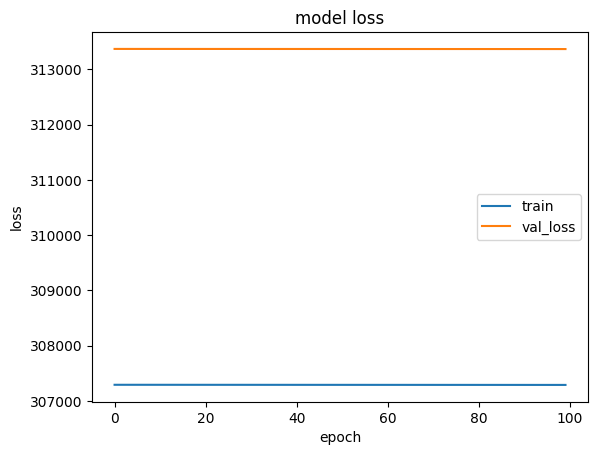

In [ ]:
plt.plot(histo.history['loss'])
plt.plot(histo.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val_loss'])
plt.show()

In [ ]:
y_predict = model(X_test)[:,0].numpy()


In [ ]:
print(y_predict.shape)

(100,)


In [ ]:
y_true = y_test[:,0].numpy()
print(y_true)

[191566.  389512.  370175.  253853.5 340720.  250771.  494542.  449650.
 389610.  107500.5 469084.5 406657.5 450198.5 294502.5 262126.5 379491.
 456154.5 173847.  184092.5 349762.  146527.  134035.  475984.5 132159.
 457463.  169954.  124183.5 178520.  413424.5 207480.5 169125.5 219127.
 434336.5 432159.5 212553.5 353237.  379991.  126957.5 340760.  528794.
 315403.5 107147.5 351318.  398998.  432836.  558355.   70862.  357294.
 212546.5 153371.5 315131.5 426796.5 418504.  311973.  505223.5 284094.5
 242950.  497572.5  53040.  423231.5 150074.  302929.5 382794.5 398023.
 542371.  240926.  408203.5 439166.  253530.5 324373.  484480.5 411701.
 515454.  265194.  393104.  584267.5 180891.5 373735.  462499.  180476.5
 372595.5 315914.5 466371.  260801.  108921.5 120092.5 248983.  443528.
 245796.  471527.5 192853.5  98242.5 425083.5 123719.5 319728.  228875.5
 190744.  240353.5 353318.  492951. ]


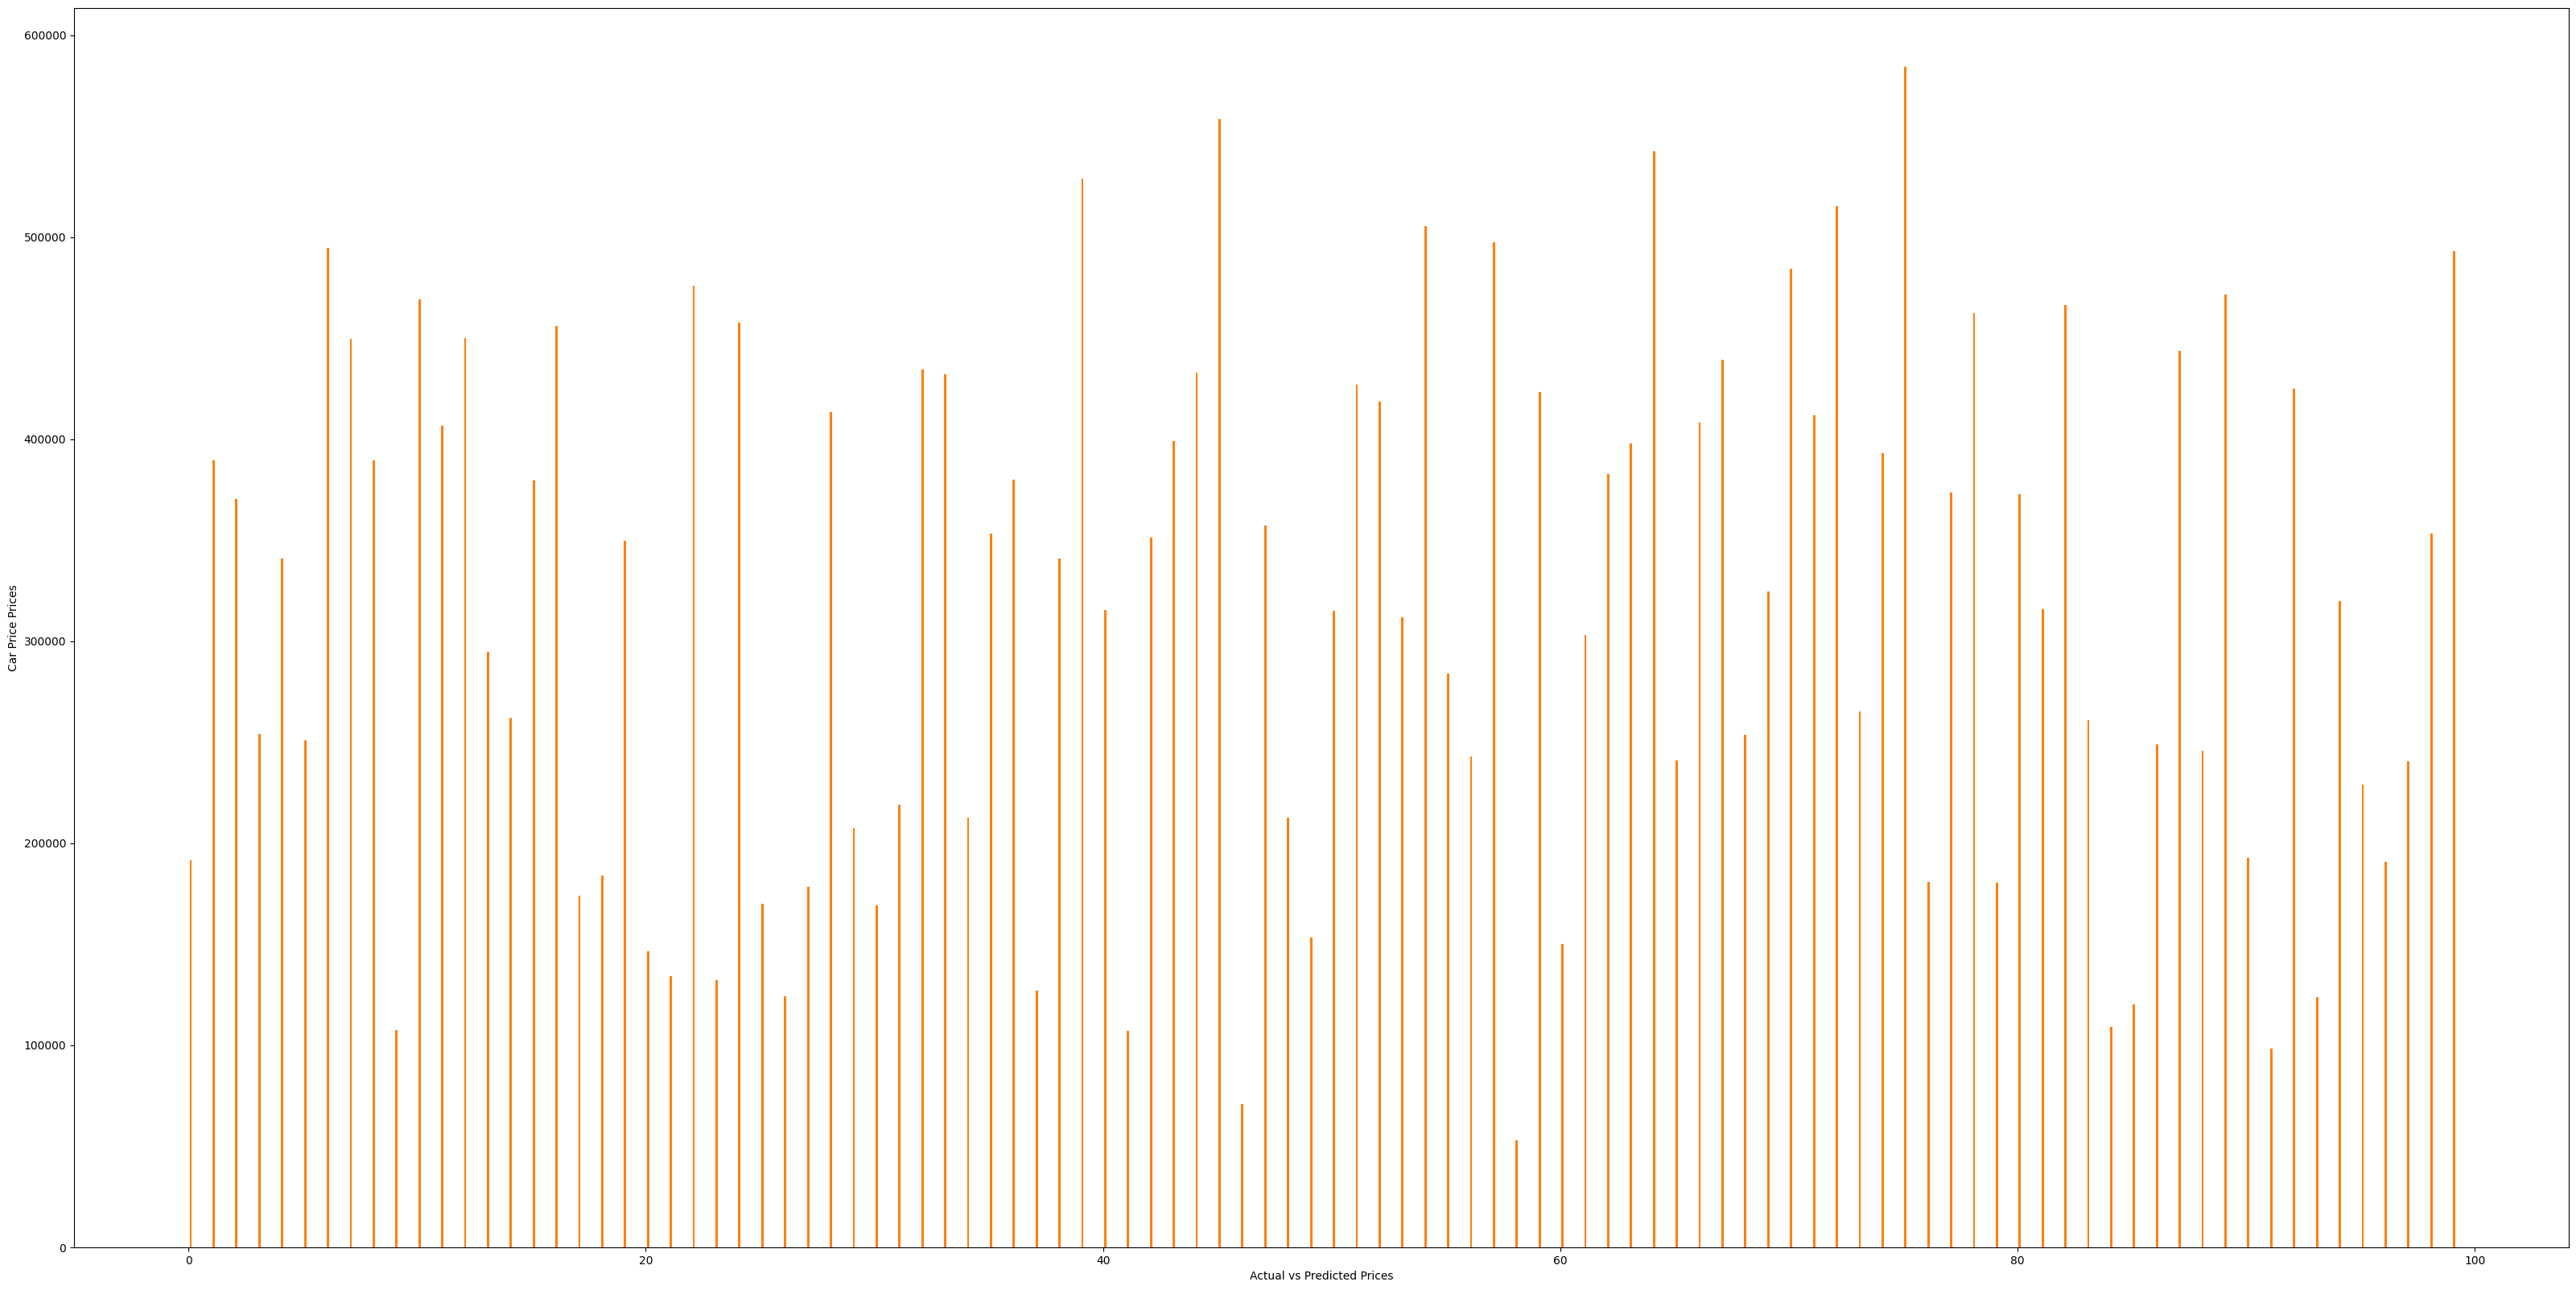

In [ ]:
ind = np.arange(100)
plt.figure(figsize=(40,20))

width = 0.1

plt.bar(ind, y_predict, width, label='Predicted Car Price')
plt.bar(ind + width, y_true, width, label='Actual Car Price')

plt.xlabel('Actual vs Predicted Prices')
plt.ylabel('Car Price Prices')

plt.show()

figsize=(40,20) is an argument that specifies the size of the figure in inches. The first value 40 represents the width and the second value 20 represents the height.

our model is underperforming as dffference between acutual and predicted is very high

Imp : ye samajhna hai hme ki hamare model mai hmne validation and tarining data set pai bure perform kara
matalab ye condition underfitting ki hai atleast model ko training data pai toh sahi perform kara chahiye


ab iske do  conclusion nikalte hai ya toh model chosen he galt hai ya hmne bahut simple model banaya hai

ab ham isko complex karenge bcoz after evaluating we got to understand that 9 faetures are not enough to learn the trating
data of 1000 data set  so for doing that we would add hidden more layers

In [107]:
model = tf.keras.Sequential(
    [
        normalizer,
        Dense(128 , activation='relu'),
        Dense(128 , activation='relu'),
            Dense(28 , activation='relu'),
        Dense(1)
    ])

In [108]:
model.compile(optimizer=Adam(learning_rate=1e-3),loss=tf.keras.losses.Huber(),metrics=RootMeanSquaredError())

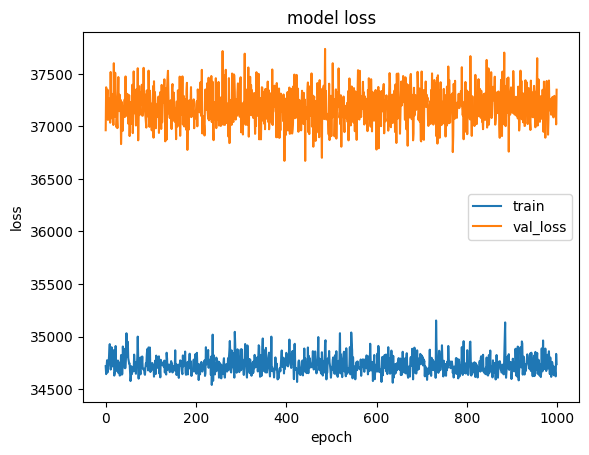

iska matlab overfitting ho gayi hai

In [109]:
histo = model.fit(X,y,validation_split=0.2,epochs=200,verbose=1)

Epoch 1/200
25/25 [==============================] - 1s 12ms/step - loss: 307301.9688 - root_mean_squared_error: 331692.3125 - val_loss: 313376.9688 - val_root_mean_squared_error: 339453.8125
Epoch 2/200
25/25 [==============================] - 0s 5ms/step - loss: 307287.9375 - root_mean_squared_error: 331679.2500 - val_loss: 313348.8750 - val_root_mean_squared_error: 339428.1250
Epoch 3/200
25/25 [==============================] - 0s 5ms/step - loss: 307230.5312 - root_mean_squared_error: 331626.0625 - val_loss: 313249.8438 - val_root_mean_squared_error: 339338.1562
Epoch 4/200
25/25 [==============================] - 0s 5ms/step - loss: 307058.7812 - root_mean_squared_error: 331467.7812 - val_loss: 312984.9375 - val_root_mean_squared_error: 339099.1562
Epoch 5/200
25/25 [==============================] - 0s 5ms/step - loss: 306643.0312 - root_mean_squared_error: 331084.0938 - val_loss: 312397.9062 - val_root_mean_squared_error: 338572.0312
Epoch 6/200
25/25 [=========================

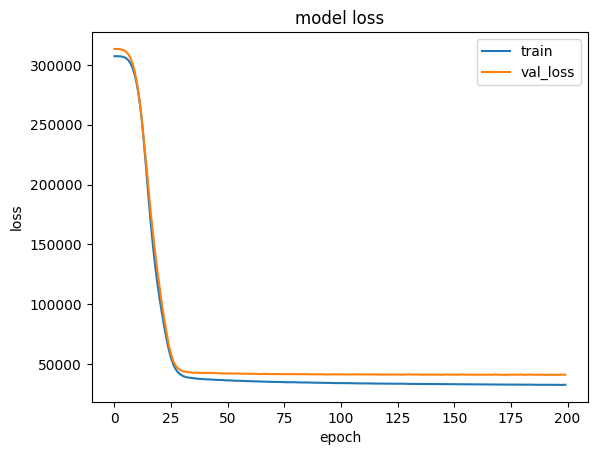

In [110]:
plt.plot(histo.history['loss'])
plt.plot(histo.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val_loss'])
plt.show()

ab ja ke sahi aya jab main no of dense layer badai


In [113]:
BUFFER_SIZE = 16
BATCH_SIZE =  64
train_dataset = tf.data.Dataset.from_tensor_slices((X_train,y_train))
train_dataset = train_dataset.shuffle(buffer_size = BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

jahan pair dalte the uske jagah ye kam a jayga bs